# KNN (K-Nearest Neighbors, K-근접 이웃 알고리즘)
- ML 알고리즘 중에서도 분류 및 회귀 문제에 인기있는 지도학습 모델
- Distance 함수, voting 시스템 등을 이해하기 최적의 알고리즘임
- 본 실습에서는 classification(분류) 문제에 초점을 맞추고 진행할 예정

### 알고리즘 overview
- feature 공간 상에서 가장 가까운 'k' 개의 이웃 중 입력되는 데이터의 클래스를 결정하는 voting 시스템
- 예를 들어 아래와 같이 포도와 배를 roundness(둥근 정도) 및 diameter(지름) 두가지 feature로 plot 되어 있다고 가정
- 새로운 과일(붉은색 점)이 주어졌을 때 이와 가장 가까운 k 지점까지 거리를 계산하여 어떤 과일일지 결정
- 예시에서 가장 가까운 3개 점을 측정하면 모두 배(pear)라 할 수 있으므로 새로운 과일도 배라고 판단할 수 있음
![knn_example](knn_example.png)

### 알고리즘 동작방식
**알고리즘 동작 순서**
1. k값 선정: k 값을 선정하여 알고리즘의 가장 가까운 이웃의 수로 사용 (하이퍼 파라미터로 튜닝 필요)
2. 거리 계산: 주어진 데이터 포인트에 대해 모든 학습 데이터 포인트까지 거리(유클리드 거리 등)를 계산함
3. k nearest neighbor 찾기: 계산된 거리에 기반해 k개의 최근접 이웃 데이터 포인트를 찾아냄
4. Majority class 결정: k개 최근접 이웃 중 가장 많은 수의 클래스를 선정
5. 예측값 선정: majority class 가 선정된 후 이를 해당 테스트 데이터 포인트의 class로 지정
6. 모든 테스트 데이터 포인트에 대해 이를 반복 (2 - 5)
- KNN의 경우 데이터셋에 대해 직접적인 학습은 진행하지 않으나 모든 학습 데이터를 메모리에 저장 후 예측에 사용함

### Distance Metric (거리측정 척도)
- Scikit learn의 경우 'minkowski' 를 기본 거리 측도로 사용하며 이는 유클리드 거리로 귀결
- Euclidean distance: $d(p,q)^2 = (q_1 - p_1)^2 + (q_2-p_2)^2$
![euclidean](euclidean.png)

- $l$1 norm: $\|x\|_1 = \sum_{i=1}^n |x_i|$
- $l$2 norm: $\|x\|_2 = \sum_{i=1}^n |x_i|^2$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Toy example 을 통한 설명

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


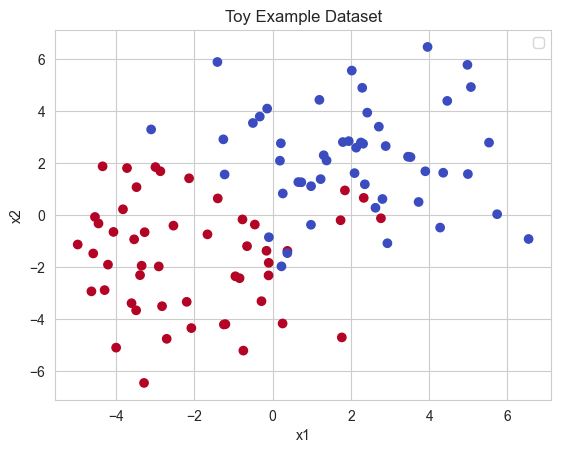

In [31]:
from sklearn.datasets import make_blobs
# Toy example 생성
X, y = make_blobs(n_samples=100, n_features=2, centers=[[2,2],[-2,-2]], cluster_std=2.0, random_state=0)
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0)

# Plot the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Toy Example Dataset')
plt.legend()
plt.show()

## Toy example KNN 학습 및 평가

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
# 학습 데이터셋/평가 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# knn 모델 학습 (k=3 으로 설정)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 학습된 knn 모델 평
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


## 실증 데이터를 이용한 학습 / 평가

In [37]:
from sklearn import datasets
from sklearn import neighbors

iris =  datasets.load_iris()